In [3]:
# %% load libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [4]:
# %% load and prepare data

# read data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")

# slice
x = df.loc[:, ['mpg']]

# z-scores
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = 'black'

# color fiat differently
df.loc[df.cars == 'Fiat X1-9', 'colors'] = 'darkorange'   # we want to show this special point

df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

In [10]:
df

,index,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z,colors
0,15,3.224903,8,460.0,215,3.00,5.424,17.82,0,0,3,4,0,Lincoln Continental,Lincoln Continental,-1.829979,black
1,14,3.224903,8,472.0,205,2.93,5.250,17.98,0,0,3,4,0,Cadillac Fleetwood,Cadillac Fleetwood,-1.829979,black
2,23,3.646917,8,350.0,245,3.73,3.840,15.41,0,0,3,4,0,Camaro Z28,Camaro Z28,-1.191664,black
3,6,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360,-0.988049,black
4,16,3.834058,8,440.0,230,3.23,5.345,17.42,0,0,3,4,0,Chrysler Imperial,Chrysler Imperial,-0.908604,black
5,30,3.872983,8,301.0,335,3.54,3.570,14.60,0,1,5,8,0,Maserati Bora,Maserati Bora,-0.849728,black
6,13,3.898718,8,275.8,180,3.07,3.780,18.00,0,0,3,3,0,Merc 450SLC,Merc 450SLC,-0.810803,black
7,22,3.898718,8,304.0,150,3.15,3.435,17.30,0,0,3,2,0,AMC Javelin,AMC Javelin,-0.810803,black
8,21,3.937004,8,318.0,150,2.76,3.520,16.87,0,0,3,2,0,Dodge Challenger,Dodge Challenger,-0.752894,black
9,28,3.974921,8,351.0,264,4.22,3.170,14.50,0,1,5,4,0,Ford Pantera L,Ford Pantera L,-0.695542,black


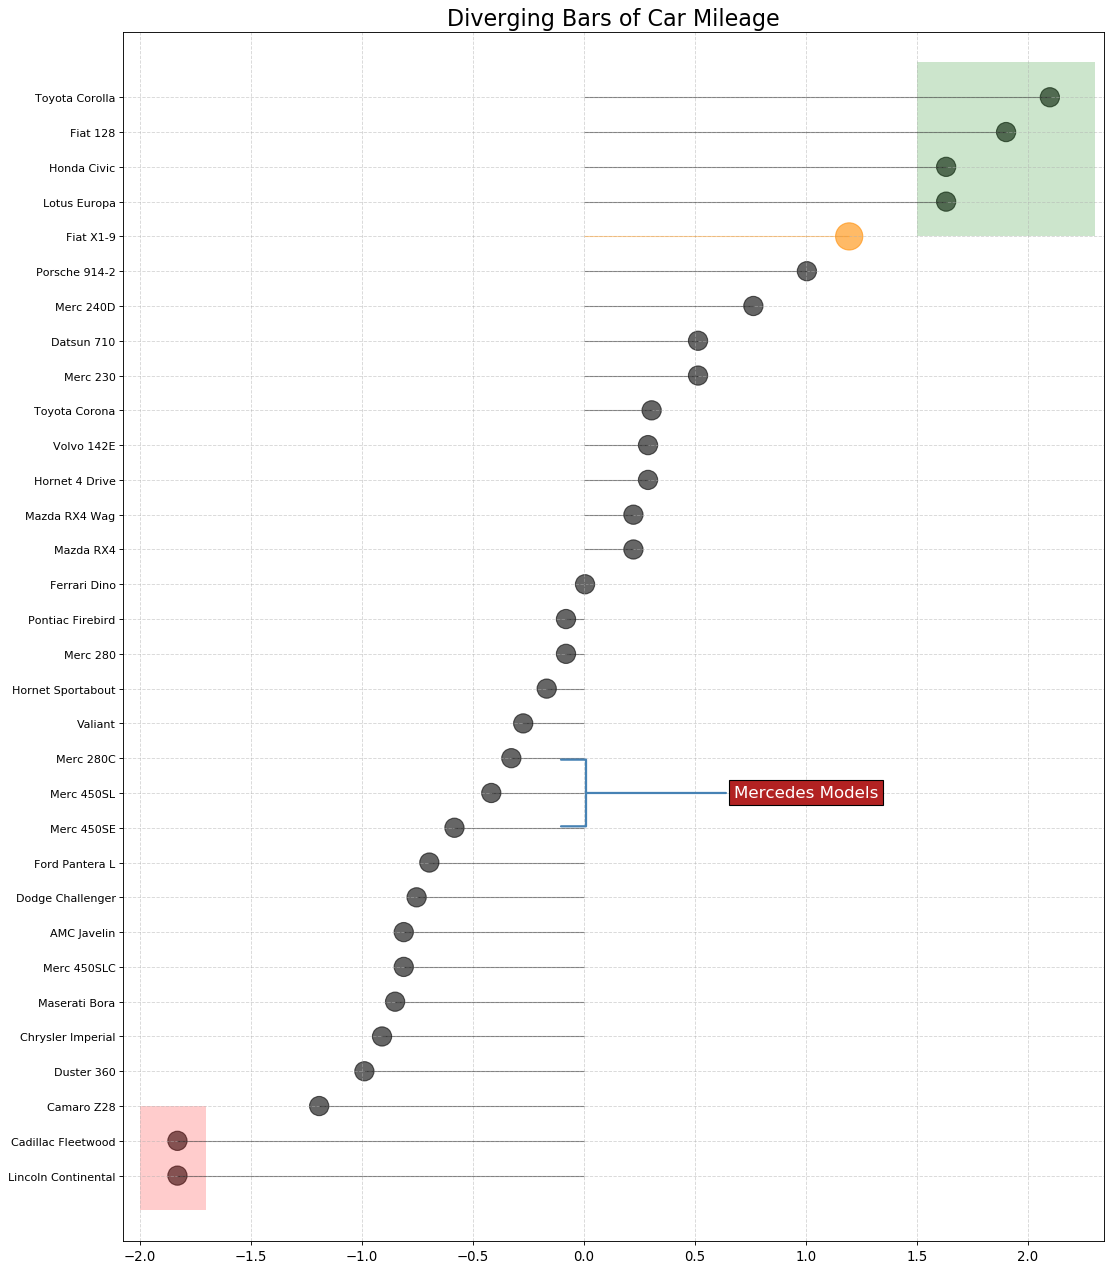

In [24]:
# %% plot data

# create figure
fig = plt.figure(figsize=(14,16), dpi= 80)

# create plot
ax = fig.add_subplot(1, 1, 1)

# horizontal lines
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z,        # draw the h-line from 0 to the respective z-score of each data point
           color=df.colors, alpha=0.4, linewidth=1)

plt.scatter(x=df.mpg_z, y=df.index,                  # plotting the data point
            color=df.colors,                         # corresponding color of each data point
            s=[600 if x == 'Fiat X1-9' else 300 for x in df.cars], alpha=0.6)   # emphasizing the visual for 1 data point

plt.yticks(df.index, df.cars)
plt.xticks(fontsize=12)

# annotations
plt.annotate('Mercedes Models',
             xy=(0.0, 11.0), xytext=(1.0, 11), xycoords='data',
             fontsize=15, ha='center', va='center',
             bbox=dict(boxstyle='square', fc='firebrick'),       # text inside a box
             arrowprops=dict(arrowstyle='-[, widthB=2.0, lengthB=1.5',  # widthB = total band width 
                            lw=2.0, color='steelblue'), color='white')  # lw = line width

# patches
# don't need to define y axis
# patches locate the y location of the data points within the x-coordinates keyed in
p1 = patches.Rectangle((-2.0, -1), width=.3, height=3, alpha=.2, facecolor='red')  # (-2, -1) = x coordinates, width = how much % of the x-axis length u want ur box to be
p2 = patches.Rectangle((1.5, 27), width=.8, height=5, alpha=.2, facecolor='green')
plt.gca().add_patch(p1)
plt.gca().add_patch(p2)

# decorate
plt.title('Diverging Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)

# save plot
plt.tight_layout()
#plt.savefig(os.path.join(os.getcwd(), 'diverging_plot_1.pdf'))


# show plot
plt.show()

Swapping the axis --> y to x

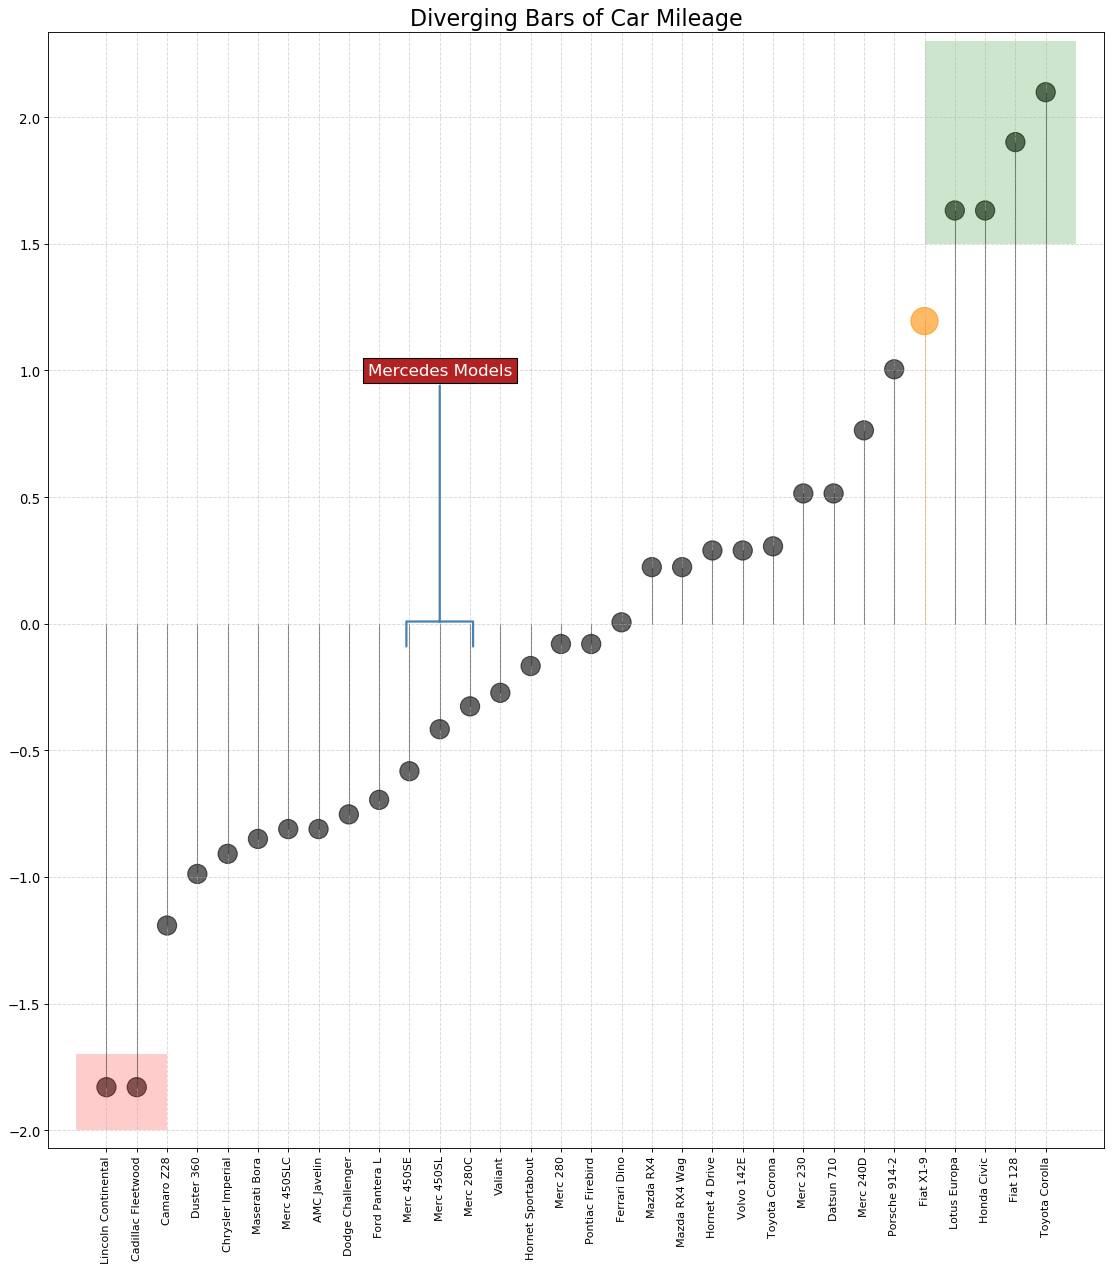

In [25]:
# %% plot data

# create figure
fig = plt.figure(figsize=(14,16), dpi= 80)

# create plot
ax = fig.add_subplot(1, 1, 1)

# horizontal lines
plt.vlines(x=df.index, ymin=0, ymax=df.mpg_z,       
           color=df.colors, alpha=0.4, linewidth=1)

plt.scatter(y = df.mpg_z, x = df.index,                      
            color=df.colors,                         
            s=[600 if x == 'Fiat X1-9' else 300 for x in df.cars], alpha=0.6)   

plt.xticks(df.index, df.cars, rotation = 90)
plt.yticks(fontsize=12)

# annotations
plt.annotate('Mercedes Models',
             xy=(11, 0.0), xytext=(11, 1.0), xycoords='data',
             fontsize=15, ha='center', va='center',
             bbox=dict(boxstyle='square', fc='firebrick'),
             arrowprops=dict(arrowstyle='-[, widthB=2.0, lengthB=1.5',
                            lw=2.0, color='steelblue'), color='white')

# patches
p1 = patches.Rectangle((-1, -2),width=3, height=.3, alpha=.2, facecolor='red')
p2 = patches.Rectangle((27, 1.5), width=5, height=.8, alpha=.2, facecolor='green')
plt.gca().add_patch(p1)
plt.gca().add_patch(p2)

# decorate
plt.title('Diverging Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)

# save plot
plt.tight_layout()
#plt.savefig(os.path.join(os.getcwd(), 'diverging_plot_1.pdf'))


# show plot
plt.show()